## GR5245 Homework 2

(a) Load the MNIST dataset from tf.keras.datasets.fashion_mnist.

In [8]:
import tensorflow as tf

(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

(b) Rescale the features to have values between 0 and 1. For simplicity, use the last 5000 instances in 
the training set as validation set for evaluation during training. 

In [9]:
x_train_full = x_train_full / 255
x_test = x_test / 255

x_train = x_train_full[:-5000]
x_val = x_train_full[-5000:]

In [86]:
y_train = y_train_full[:-5000]

(c) Use keras Sequential API to create two models - an encoder and a decoder with layers as shown 
below. And then use Sequential API again to create an autoencoder model from the encoder and 
decoder. 

In [12]:
encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
])


In [13]:
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(784, activation="sigmoid"),
    tf.keras.layers.Reshape((28, 28)),
])


In [14]:
autoencoder = tf.keras.Sequential([
    encoder,
    decoder,
])


(d)  Compile the autoencoder model using the choices below.

    i. Loss: binary cross entropy

    ii. Metric: note that the 784 values in each label are not binary values 0 or 1. To compute the 
    binary accuracy, we would first round the pixel values to an integer to make them binary values. 
    Use the following function as the metric. 

```python
def rounded_accuracy(y_true, y_pred): 
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred)) 
``` 
    iii. Optimizer: SGD with learning rate = 1.5

It’s recommended to set the number of epochs to be large (eg. 100) and include early stopping criterion 
(with patience=3, also set restore_best_weights=True) in the training process.

In [15]:
loss = tf.keras.losses.BinaryCrossentropy()


In [16]:
def rounded_accuracy(y_true, y_pred): 
    return tf.keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred)) 

In [17]:
opt = tf.keras.optimizers.SGD(learning_rate=1.5)


In [25]:
autoencoder.compile(optimizer=opt,
                    loss=loss,
                    metrics=[rounded_accuracy])


In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [26]:
history = autoencoder.fit(x_train,
                          x_train,
                          validation_data=(x_val, x_val),
                          batch_size=32,
                          epochs=100,
                          callbacks=[early_stopping])


Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2752 - rounded_accuracy: 0.9439 - val_loss: 0.2783 - val_rounded_accuracy: 0.9391
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2748 - rounded_accuracy: 0.9442 - val_loss: 0.2798 - val_rounded_accuracy: 0.9363
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2744 - rounded_accuracy: 0.9447 - val_loss: 0.2763 - val_rounded_accuracy: 0.9431
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2741 - rounded_accuracy: 0.9449 - val_loss: 0.2766 - val_rounded_accuracy: 0.9460
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2738 - rounded_accuracy: 0.9453 - val_loss: 0.2752 - val_rounded_accuracy: 0.9462
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2735 - rounded_accuracy: 0.9457 - val_loss: 0.2750 - val_rounded_accuracy: 0.9439
Epoch 7/100
1719/1719 [===========

(e) Use mathplotlib.pyplot to plot the training loss and validation loss against the number of epochs. 

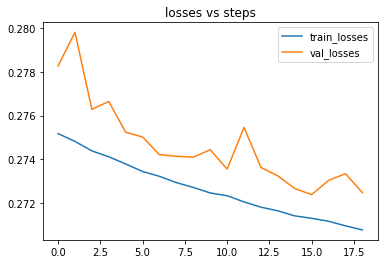

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"],
         label="train_losses")
plt.plot(history.history["val_loss"],
         label="val_losses")

plt.legend(loc="upper right")
plt.title("losses vs steps")

plt.show()

(f) Use the autoencoder to predict the first 5 images in the testing set. Plot these predicted images and 
their corresponding actual images as two rows to examine visually how close they are.

In [48]:
import numpy as np

1/1 [==============================] - 0s 12ms/step


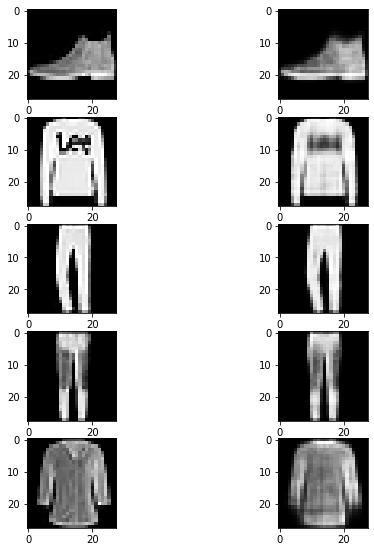

In [82]:
fig, ax = plt.subplots(5, 2)
fig.set_figheight(8)
fig.set_figwidth(8)
# fig.tight_layout()
for index, image in enumerate(x_test[:5]):
    ax[index, 0].imshow(image, cmap="gray")
    ax[index, 1].imshow(autoencoder.predict(image[None, ...])[0], cmap="gray")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.2,
                    hspace=0.2)
plt.show()


(g) Use Sequential API to create a neural network to include the trained layers of the encoder and the 
additional layers as shown below. 

In [83]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

(h) Freeze the weights in the encoder part to train the model in part (g) using the first 3000 instances in 
the training set. This time the model is trained for the multiclass classification task. Make sure that 
the labels for the 3000 instances are converted to one-hot vectors of length 10. Use the following 
choices to compile the model. 

i. Loss: categorical cross entropy  
ii. Metric: categorical accuracy  
iii. Optimizer: Adam with learning rate = 0.001 
iv. Validation split: 20%  
Set the number of epochs to be large (eg. 100) and include early stopping criterion (with 
patience=3, also set restore_best_weights=True)in the training process. 

In [84]:
encoder.trainable = False

In [90]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=[tf.keras.metrics.categorical_accuracy],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)


In [89]:
model.fit(
    x_train[:3000],
    tf.one_hot(y_train[:3000], 10),
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Epoch 1/100
75/75 [==============================] - 0s 2ms/step - loss: 2.5009 - categorical_accuracy: 0.2700 - val_loss: 1.5950 - val_categorical_accuracy: 0.4100
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 1.1835 - categorical_accuracy: 0.5779 - val_loss: 1.0496 - val_categorical_accuracy: 0.6233
Epoch 3/100
75/75 [==============================] - 0s 936us/step - loss: 0.8435 - categorical_accuracy: 0.7067 - val_loss: 0.8655 - val_categorical_accuracy: 0.7000
Epoch 4/100
75/75 [==============================] - 0s 940us/step - loss: 0.7239 - categorical_accuracy: 0.7471 - val_loss: 0.7731 - val_categorical_accuracy: 0.7250
Epoch 5/100
75/75 [==============================] - 0s 967us/step - loss: 0.6552 - categorical_accuracy: 0.7708 - val_loss: 0.7221 - val_categorical_accuracy: 0.7400
Epoch 6/100
75/75 [==============================] - 0s 922us/step - loss: 0.6086 - categorical_accuracy: 0.7833 - val_loss: 0.6848 - val_categorical_accuracy: 0.7483
Ep

(i) Evaluate the model accuracy for the testing set. 

In [91]:
model.evaluate(x_test, tf.one_hot(y_test, 10))

313/313 [==============================] - 0s 526us/step - loss: 0.5506 - categorical_accuracy: 0.7951


[0.5505728721618652, 0.7950999736785889]